## 一、numpy scipy matplotlib

### 1、 numpy:  numpy是一个高性能的多维数组的计算库，使用numpy提高效率的四个方法：

In [17]:
import timeit
import numpy as np

#### （1）NumPy’s ufuncs : ufunc是universal function的缩写，它是一种能对数组中每个元素进行操作的函数。Numpy内置的许多ufunc函数都是C语言实现的，计算速度非常快

In [2]:
a = list(range(100000))
%timeit [val + 5 for val in a]

6.27 ms ± 616 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [3]:
a = np.array(a)
%timeit a + 5

86.5 µs ± 15.9 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [4]:
%timeit np.sin(a)

3.48 ms ± 111 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


#### (2) NumPy’s aggregations : 计算描述数组的值的函数， 比如 min, max, sum,mean等等

In [5]:
from random import random
c = [random() for i in range(100000)]
%timeit min(c)

2.5 ms ± 58.2 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [6]:
c = np.array(c)
%timeit c.min()

34.8 µs ± 4.67 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [7]:
# 多维数组同样适用
M = np.random.randint(0, 10, (3,5))
M

array([[7, 8, 5, 8, 6],
       [7, 9, 1, 2, 7],
       [7, 6, 9, 4, 1]])

In [8]:
M.sum()

87

In [9]:
M.sum(axis=0)

array([21, 23, 15, 14, 14])

In [10]:
M.sum(axis=1)

array([34, 26, 27])

In [11]:
# np.max() np.sum() np.prod() np.mean() 
# np.std() np.var() np.any() np.all() np.median() np.percentile() np.argmin() np.argmax()
# 它们都有同样的功能

#### (3) NumPy’s broadcasting : broadcasting 是 当使用ufuncs 来计算不同大小或者维度的数组时，制定的计算规则

In [16]:
np.arange(3) + 5   # [0, 1, 2] + [5, 5, 5]

array([5, 6, 7])

In [17]:
np.ones((3,3)) + np.arange(3)

array([[ 1.,  2.,  3.],
       [ 1.,  2.,  3.],
       [ 1.,  2.,  3.]])

In [18]:
np.arange(3).reshape((3,1)) + np.arange(3)

array([[0, 1, 2],
       [1, 2, 3],
       [2, 3, 4]])

#### (4) Use NumPy’s slicing, masking, and fancy indexing
 

In [19]:
L = [2, 3, 5, 7, 11]
L[1:4]

[3, 5, 7]

In [21]:
L = np.array(L)
L[1:4]

array([3, 5, 7])

In [22]:
mask = np.array([False, False,True, False,True])
L[mask]

array([ 5, 11])

In [23]:
mask = (L<4) | (L>8)

In [24]:
L[mask]

array([ 2,  3, 11])

#### numpy常用操作

In [53]:
print('全为1：',np.ones((3,3))) #

全为1： [[ 1.  1.  1.]
 [ 1.  1.  1.]
 [ 1.  1.  1.]]


In [54]:
print('全为0：',np.zeros((3,3)))

全为1： [[ 0.  0.  0.]
 [ 0.  0.  0.]
 [ 0.  0.  0.]]


In [56]:
print('单位矩阵：',np.eye(3))

单位矩阵： [[ 1.  0.  0.]
 [ 0.  1.  0.]
 [ 0.  0.  1.]]


In [58]:
np.diag([1,2,3]) # 对角矩阵

array([[1, 0, 0],
       [0, 2, 0],
       [0, 0, 3]])

In [61]:
#矩阵的垂直组合
a = np.array([1,2,3])
b = np.array([[1,2,3],[4,5,6]])
np.vstack((b,a))

array([[1, 2, 3],
       [4, 5, 6],
       [1, 2, 3]])

In [65]:
#水平组合
a = np.array([[1,2],[3,4]])
b = np.array([[1,2,3,6],[4,5,6,7]])
np.hstack((a,b))

array([[1, 2, 1, 2, 3, 6],
       [3, 4, 4, 5, 6, 7]])

### Scipy: SciPy是构建在numpy的基础之上的，它提供了许多的操作numpy的数组的函数。SciPy是一款方便、易于使用、专为科学和工程设计的python工具包，它包括了统计、优化、整合以及线性代数模块、傅里叶变换、信号和图像图例，常微分方差的求解等

#### 图像

In [130]:
from scipy.misc import imread, imsave, imresize, imshow

In [131]:
from PIL import Image

In [136]:
img = imread('download.jpg')

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  """Entry point for launching an IPython kernel.


In [146]:
img_tinted = img * [0.1, 1, 0.1]

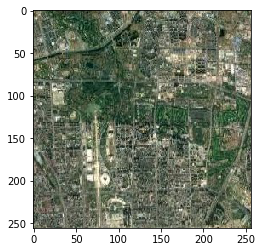

In [147]:
plt.imshow(img)

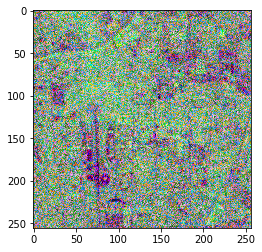

In [148]:
plt.imshow(img_tinted)

In [ ]:
imsave('result.jpg', img_tinted)

#### 插值

In [3]:
from scipy.interpolate import interp1d

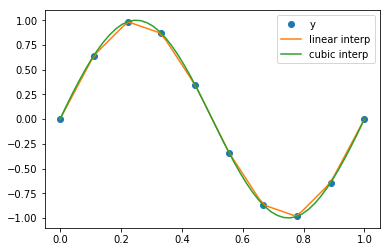

In [21]:
x = np.linspace(0, 1, 10)
y = np.sin(2 * np.pi * x)
computed_time = np.linspace(0, 1, 50)
#线性插值
linear_interp = interp1d(x, y)
linear_results = linear_interp(computed_time)
#三次方插值
cubic_interp = interp1d(x, y, kind='cubic')
cubic_results = cubic_interp(computed_time)
#作图
plt.plot(x, y, 'o', ms=6, label='y')
plt.plot(computed_time, linear_results, label='linear interp')
plt.plot(computed_time, cubic_results, label='cubic interp')
plt.legend()
plt.show()

#### 线性代数操作

In [8]:
# 行列式
from scipy import linalg
M = np.random.randint(0, 10, (2,2))
print(M)
linalg.det(M)

[[6 7]
 [3 1]]


-15.0

In [9]:
#逆矩阵
linalg.inv(M)

array([[-0.06666667,  0.46666667],
       [ 0.2       , -0.4       ]])

In [10]:
#奇异值分解
linalg.svd(M)

(array([[-0.95709203, -0.28978415],
        [-0.28978415,  0.95709203]]),
 array([ 9.62129882,  1.55904107]),
 array([[-0.68721539, -0.72645372],
        [ 0.72645372, -0.68721539]]))

#### 梯度下降优化

In [73]:
from scipy import optimize
def f(x):
    return x**2-2*x
initial_x = 0.1
optimize.fmin_bfgs(f,initial_x)

Optimization terminated successfully.
         Current function value: -1.000000
         Iterations: 2
         Function evaluations: 9
         Gradient evaluations: 3


array([ 0.99999999])

#### 拟合


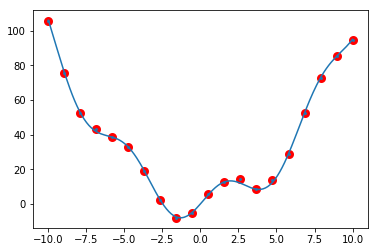

array([  1.00469925,  10.14165239])

In [45]:
def f(x):
    return x**2 + 10*np.sin(x)
xdata = np.linspace(-10, 10, num=20)
ydata = f(xdata)+np.random.randn(xdata.size)
plt.scatter(xdata, ydata, linewidths=3.0, 
       edgecolors="red")
#plt.show()
#拟合
def f2(x,a,b):
    return a*x**2 + b*np.sin(x)
guess = [0.1,1] #初始化参数
params, params_covariance = optimize.curve_fit(f2, xdata, ydata, guess)
#画出拟合的曲线
x1 = np.linspace(-10,10,256)
y1 = f2(x1,params[0],params[1])
plt.plot(x1,y1)
plt.show()

#### 求解非线性方程组

In [50]:

from scipy.optimize import fsolve
def func(x):
    x0,x1,x2 = x.tolist()
    return [5*x1-25,5*x0*x0-x1*x2,x2*x0-27]
initial_x = [2,3,1]
result = fsolve(func, initial_x)
print (result)

[ 3.  5.  9.]


0

### Matplotlib 是一个非常强大的 Python 画图工具; 折线图、柱状图、散点图等

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

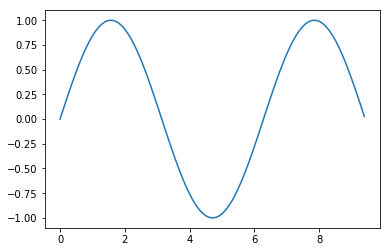

In [109]:
# Compute the x and y coordinates for points on a sine curve
x = np.arange(0, 3 * np.pi, 0.1)
y = np.sin(x)
# Plot the points using matplotlib
plt.plot(x, y)


<Container object of 18 artists>

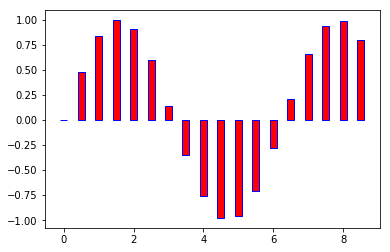

In [111]:
# 直方图
x = np.arange(0, 3 * 3, 0.5)
y = np.sin(x)
plt.bar(x, y, facecolor="red", edgecolor="blue",width=0.2 )

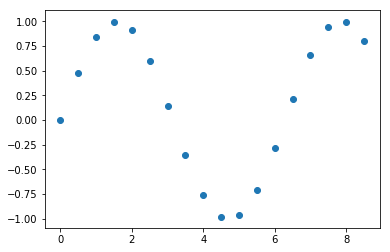

In [112]:
#散点图
plt.scatter(x,y)

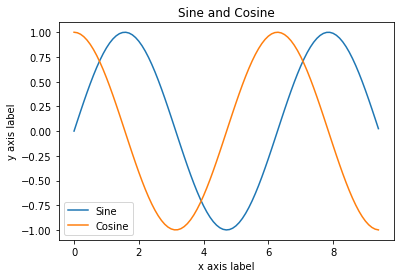

In [163]:
x = np.arange(0, 3 * np.pi, 0.1)

y_sin = np.sin(x)
y_cos = np.cos(x)

# Plot the points using matplotlib
plt.plot(x, y_sin)
plt.plot(x, y_cos)
plt.xlabel('x axis label')
plt.ylabel('y axis label')
#plt.grid(True, linestyle = "-.", color = "b", linewidth = "1")  # 格网
plt.title('Sine and Cosine')
plt.legend(['Sine', 'Cosine'])

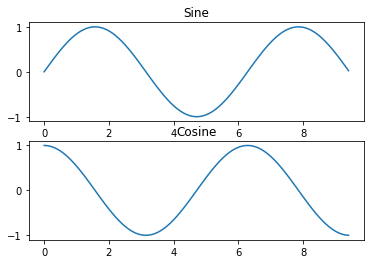

In [97]:
# Compute the x and y coordinates for points on sine and cosine curves
x = np.arange(0, 3 * np.pi, 0.1)
y_sin = np.sin(x)
y_cos = np.cos(x)

# Set up a subplot grid that has height 2 and width 1,
# and set the first such subplot as active.
plt.subplot(2, 1, 1)

# Make the first plot
plt.plot(x, y_sin)
plt.title('Sine')

# Set the second subplot as active, and make the second plot.
plt.subplot(2, 1, 2)
plt.plot(x, y_cos)
plt.title('Cosine')
#plt.figure(figsize=(16,8))
# Show the figure.
plt.show()

In [122]:
from matplotlib.colors import Colormap

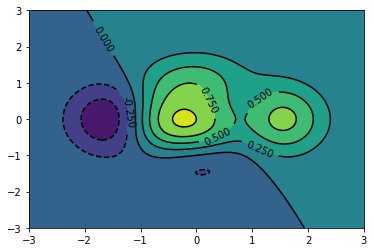

In [127]:
#等高线

def f(x,y):
    return (1 - x / 2 + x**5 + y**3) * np.exp(-x**2 -y**2)
n = 256
x = np.linspace(-3,3,n)
y = np.linspace(-3,3,n)
X,Y = np.meshgrid(x,y)
plt.contourf(X,Y,f(X,Y),alpha=1)
C = plt.contour(X,Y,f(X, Y),colors='black')
plt.clabel(C)
plt.show()

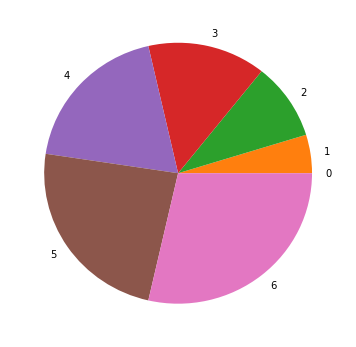

In [4]:
plt.figure(figsize=(6,6))
n = 7
Z = np.arange(n)
plt.pie(Z,labels=Z)
plt.show()

In [160]:
#3D表面

In [158]:
from mpl_toolkits.mplot3d import Axes3D

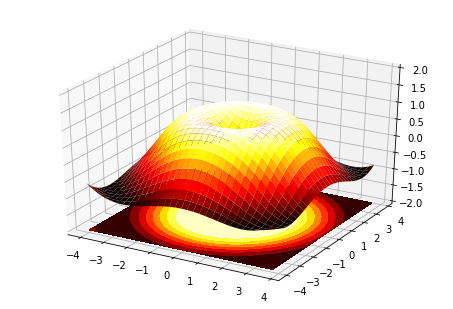

In [164]:
fig = plt.figure()
ax = Axes3D(fig)
X = np.arange(-4, 4, 0.25)
Y = np.arange(-4, 4, 0.25)
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X ** 2 + Y ** 2)
Z = np.sin(R)
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=plt.cm.hot)
ax.contourf(X, Y, Z, zdir='z', offset=-2, cmap=plt.cm.hot)
ax.set_zlim(-2, 2)
plt.show()

# gis 操作

## fiona

In [1]:
import csv
with open('fiona_test.csv', 'r') as f:
    reader = csv.DictReader(f)
    for row in reader:
        print(row)

{'lat': '41.88', 'lon': '-87.63', 'name': 'Chicago'}
{'lat': '39.101', 'lon': '-94.584', 'name': 'Kansas City'}


In [7]:
import csv
from shapely.geometry import Point
with open('fiona_test.csv', 'r') as f:
    reader = csv.DictReader(f)
    for row in reader:
        point = Point(float(row['lon']), float(row['lat']))
        print(point)

POINT (-87.63 41.88)
POINT (-94.584 39.101)


In [ ]:
#写shp

In [21]:
from fiona import collection
from shapely.geometry import Point, mapping,shape
schema = { 'geometry': 'Point', 'properties': { 'name': 'str' } }
with collection(
    "fiona_test.shp", "w", "ESRI Shapefile", schema) as output:
    with open('fiona_test.csv', 'r') as f:
        reader = csv.DictReader(f)
        for row in reader:
            point = Point(float(row['lon']), float(row['lat']))
            output.write({
                'properties': {
                    'name': row['name']
                },
                'geometry': mapping(point)
            })

In [24]:
from geopandas import read_file

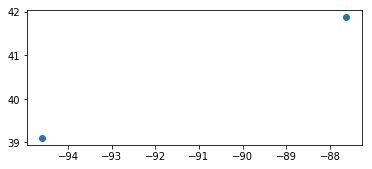

In [25]:
read_file('fiona_test.shp').plot()

In [ ]:
#读取

In [23]:
with collection("fiona_test.shp", "r") as input:
    for point in input:
        print (shape(point['geometry']))

POINT (-87.63 41.88)
POINT (-94.584 39.101)


### shapely:   空间操作

In [28]:
#buffer 缓冲区
from shapely.geometry import mapping, shape
from fiona import collection

with collection("fiona_test.shp", "r") as input:
    # schema = input.schema.copy()
    schema = { 'geometry': 'Polygon', 'properties': { 'name': 'str' } }
    with collection(
        "some_buffer.shp", "w", "ESRI Shapefile", schema) as output:
        for point in input:
            output.write({
                'properties': {
                    'name': point['properties']['name']
                },
                'geometry': mapping(shape(point['geometry']).buffer(5.0))
            })

In [ ]:
#union 合并

In [31]:
from shapely.geometry import mapping, shape
from shapely.ops import cascaded_union
from fiona import collection

with collection("some_buffer.shp", "r") as input:
    schema = input.schema.copy()
    with collection(
            "some_union.shp", "w", "ESRI Shapefile", schema) as output:
        shapes = []
        for f in input:
            shapes.append(shape(f['geometry']))
        merged = cascaded_union(shapes)
        output.write({
            'properties': {
                'name': 'Buffer Area'
                },
            'geometry': mapping(merged)
            })

# ------------------------GDAL---------------------------

## 矢量数据

In [8]:
#读取shp文件 获得要素数量
import os
from osgeo import ogr

daShapefile = r"fiona_test.shp"

driver = ogr.GetDriverByName('ESRI Shapefile')

dataSource = driver.Open(daShapefile, 0) # 0 means read-only. 1 means writeable.

# Check to see if shapefile is found.
if dataSource is None:
    print('Could not open %s'%(daShapefile))
else:
    print ('Opened %s' % (daShapefile))
    layer = dataSource.GetLayer()
    featureCount = layer.GetFeatureCount()
    print("Number of features in %s: %d" % (os.path.basename(daShapefile),featureCount))

Opened fiona_test.shp
Number of features in fiona_test.shp: 2


In [2]:
#获得数据库中所有图层
from osgeo import ogr

databaseServer = "192.168.65.1"
databaseName = "geohey"
databaseUser = "jingcb"
databasePW = "290504"


connString = "PG: host=%s dbname=%s user=%s password=%s" %(databaseServer,databaseName,databaseUser,databasePW)

conn = ogr.Open(connString)

layerList = []
for i in conn:
    daLayer = i.GetName()
    if not daLayer in layerList:
        layerList.append(daLayer)

layerList.sort()

for j in layerList:
    print(j)

# Close connection
conn = None

base.administration_township
bigdata
fangtest
fangtest_beijing_sub
fangtest_point
poi_dis
town
world_country_point
world_country_polygon


In [3]:
#获得 数据库图层的要素数量
import sys
def GetPGLayer( lyr_name ):
    conn = ogr.Open(connString)

    lyr = conn.GetLayer( lyr_name )
    if lyr is None:
        print >> sys.stderr, '[ ERROR ]: layer name = "%s" could not be found in database "%s"' % ( lyr_name, databaseName )
        sys.exit( 1 )

    featureCount = lyr.GetFeatureCount()
    print ("Number of features in %s: %d" % ( lyr_name , featureCount ))

    # Close connection
    conn = None

In [4]:
GetPGLayer('fangtest')

Number of features in fangtest: 2305


In [5]:
#获取要素的geometry
from osgeo import ogr
import os

shapefile = "fiona_test.shp"
driver = ogr.GetDriverByName("ESRI Shapefile")
dataSource = driver.Open(shapefile, 0)
layer = dataSource.GetLayer()

for feature in layer:
    geom = feature.GetGeometryRef()
    print(geom.Centroid().ExportToWkt())

POINT (-87.63 41.88)
POINT (-94.584 39.101)


In [7]:
#属性过滤
from osgeo import ogr
import os

shapefile = "fiona_test.shp"
driver = ogr.GetDriverByName("ESRI Shapefile")
dataSource = driver.Open(shapefile, 0)
layer = dataSource.GetLayer()

layer.SetAttributeFilter("name = 'Chicago'")

for feature in layer:
    print (feature.GetField("name"))

Chicago


In [8]:
#获取属性名
from osgeo import ogr

daShapefile = r"fiona_test.shp"

dataSource = ogr.Open(daShapefile)
daLayer = dataSource.GetLayer(0)
layerDefinition = daLayer.GetLayerDefn()


for i in range(layerDefinition.GetFieldCount()):
    print(layerDefinition.GetFieldDefn(i).GetName())

name


## 栅格影像

In [2]:
#打开数据，获取影像元数据
from osgeo import gdal
gtif = gdal.Open( "images/input.tif" )
print(gtif.GetMetadata())

{'AREA_OR_POINT': 'Point'}


In [6]:
# 获取波段信息
srcband = gtif.GetRasterBand(1)

In [10]:
# 统计信息
srcband.GetStatistics( True, True )   #最小像素值， 最大， 平均，标准偏差

[8896.0, 33262.0, 10320.252106409176, 882.4653425033526]

In [13]:
print("[ NO DATA VALUE ] = ", srcband.GetNoDataValue())
print( "[ SCALE ] = ", srcband.GetScale())
print( "[ UNIT TYPE ] = ", srcband.GetUnitType())

[ NO DATA VALUE ] =  0.0
[ SCALE ] =  1.0
[ UNIT TYPE ] =  


In [ ]:
#某一个波段的矢栅转换
from osgeo import gdal, ogr
import sys
# this allows GDAL to throw Python Exceptions
gdal.UseExceptions()

#
#  get raster datasource
#
src_ds = gdal.Open( "images/input.tif" )
if src_ds is None:
    print('Unable to open %s' % src_filename)
    sys.exit(1)

try:
    srcband = src_ds.GetRasterBand(1)
except RuntimeError as e:
    # for example, try GetRasterBand(10)
    print('Band ( %i ) not found' % 1)
    print (e)
    sys.exit(1)

#
#  create output datasource
#
dst_layername = "POLYGONIZED_STUFF"
drv = ogr.GetDriverByName("ESRI Shapefile")
dst_ds = drv.CreateDataSource( dst_layername + ".shp" )
dst_layer = dst_ds.CreateLayer(dst_layername, srs = None )

gdal.Polygonize( srcband, None, dst_layer, -1, [], callback=None )

# -------------------------rasterio----------------------------

In [1]:
import rasterio

In [4]:
#读取tiff文件
dataset = rasterio.open('images/input.tif')

In [5]:
dataset.name

'images/input.tif'

In [6]:
dataset.mode

'r'

In [7]:
dataset.closed

False

In [8]:
dataset.count

1

In [9]:
dataset.width

7751

In [10]:
dataset.height

7881

In [11]:
dataset.bounds

BoundingBox(left=358185.0, bottom=4346085.0, right=590715.0, top=4582515.0)

In [13]:
#仿射变换矩阵
dataset.transform

/usr/local/lib/python3.5/dist-packages/IPython/core/interactiveshell.py:2910: FutureWarning: The value of this property will change in version 1.0. Please see https://github.com/mapbox/rasterio/issues/86 for details.
  exec(code_obj, self.user_global_ns, self.user_ns)


[358185.0, 30.0, 0.0, 4582515.0, 0.0, -30.0]

In [66]:
#利用变换矩阵求取某一像素点的地理坐标
[1,0,0]@(np.array(dataset.transform).reshape(2,3).T)

/usr/local/lib/python3.5/dist-packages/IPython/core/interactiveshell.py:2910: FutureWarning: The value of this property will change in version 1.0. Please see https://github.com/mapbox/rasterio/issues/86 for details.
  exec(code_obj, self.user_global_ns, self.user_ns)


array([  358185.,  4582515.])

In [67]:
[1,7,7]@(np.array(dataset.transform).reshape(2,3).T)

/usr/local/lib/python3.5/dist-packages/IPython/core/interactiveshell.py:2910: FutureWarning: The value of this property will change in version 1.0. Please see https://github.com/mapbox/rasterio/issues/86 for details.
  exec(code_obj, self.user_global_ns, self.user_ns)


array([  358395.,  4582305.])

In [77]:
#新版本
dataset.xy(7, 7)

AttributeError: 'rasterio._io.RasterReader' object has no attribute 'xy'

In [69]:
#坐标系
dataset.crs

CRS({'init': 'epsg:32650'})

In [70]:
#波段
dataset.read(1)


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ..., 
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint16)

##### read()方法返回的是numpy数组

In [76]:
#行列号索引
dataset.read(1)[dataset.height // 2, dataset.width // 2]

10716

In [75]:
#空间索引
x, y = (dataset.bounds.left + 100000, dataset.bounds.top - 50000)
row, col = dataset.index(x, y)
row, col

(1666, 3333)